In [20]:
from visualization_fct import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import scale

# from bokeh.plotting import output_file, show, save
# from bokeh.mpl import to_bokeh

from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.plotting import output_notebook, show, output_file
output_notebook()

import matplotlib.pyplot as plt  # , mpld3
import pyfits
%matplotlib notebook

np.random.seed(0)

# for now, no ratio in data (no rates A, B or C in this dataset)

only_flux = False
scale_data = False

hdulist = pyfits.open('../iirc_data/all_data_for_ml_properaverages.fits')
data = hdulist[1].data

#data=data[500:]

X_flux, X, data_thr, data_fr_en = get_iirc_data(
    data, only_flux=only_flux, scale_data=scale_data, thresholded=True)[:4]

mjd_iirc = (data_thr['tstart'] + data_thr['tstop']) / 2.
orbit_iirc = data['orbitalphase']

Loading BokehJS ...

0.00044610660810207037

In [3]:
X_flux[:, :78] = np.divide(X_flux[:, :78], (data_fr_en * 1000))

In [4]:
bin_size = (15 - 2.1) / 78
ind_high_A = int((3 - 2.1) / bin_size) + 1
print 2.1 + ind_high_A * bin_size
ind_low_C = int((5 - 2.1) / bin_size) + 1
print 2.1 + ind_low_C * bin_size
ind_high_C = int((12 - 2.1) / bin_size) + 1
print 2.1 + ind_high_C * bin_size

3.09230769231
5.07692307692
12.0230769231


In [5]:
rA = X_flux[:, :(ind_high_A+1)].sum(axis=1)
rC = X_flux[:, ind_low_C:].sum(axis=1)
r = X_flux[:, :].sum(axis=1)
rCA = rC / rA

<IPython.core.display.Javascript object>


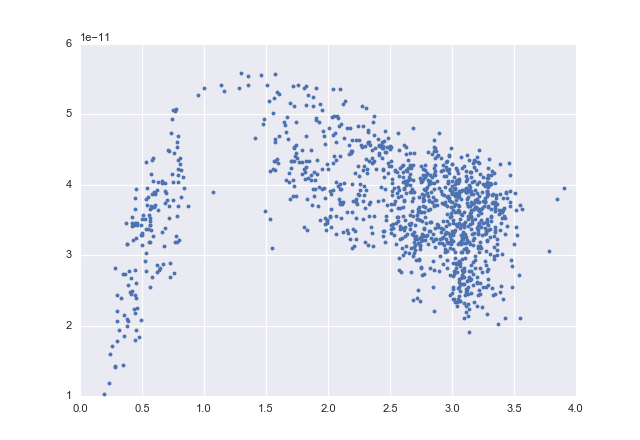

In [6]:
plt.figure()
plt.plot(rCA, r, '.')
plt.show()

In [7]:
print(r)


[  3.13781298e-11   3.06343740e-11   3.00648667e-11 ...,   3.79670246e-11
   3.65381446e-11   1.78724022e-11]


<IPython.core.display.Javascript object>


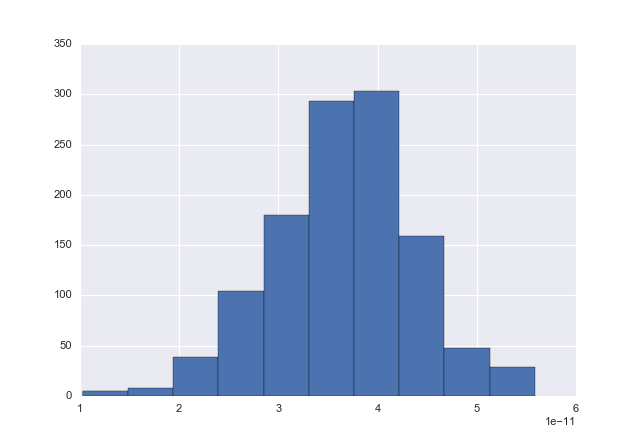

(array([   5.,    8.,   39.,  104.,  180.,  293.,  303.,  159.,   48.,   29.]),
 array([  1.02808585e-11,   1.48368473e-11,   1.93928361e-11,
          2.39488248e-11,   2.85048136e-11,   3.30608024e-11,
          3.76167912e-11,   4.21727800e-11,   4.67287688e-11,
          5.12847575e-11,   5.58407463e-11]),
 <a list of 10 Patch objects>)

In [8]:
plt.figure()
plt.hist(r)

In [9]:
data = pd.read_csv("../asm_data/asm_data_for_ml.txt", sep='\t')
data['rateCA'] = data.rateC / data.rateA
#data_thr = mask(data, 'orbit')  # rm too large values except for 'orbit'
data_thr = data
X = np.c_[data_thr.orbit, data_thr.rate, data_thr.rateA, data_thr.rateB,
          data_thr.rateC, data_thr.rateCA]
mjd_asm = data_thr['MJD']
orbit_asm = data_thr['orbit']

<IPython.core.display.Javascript object>


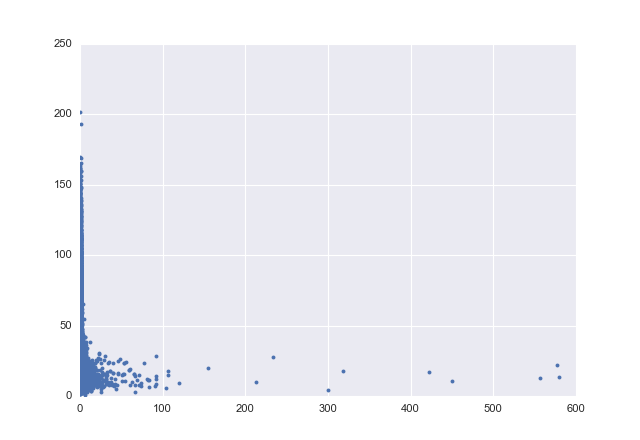

In [10]:
plt.figure()
plt.plot(data_thr.rateCA, data_thr.rate, '.')

<IPython.core.display.Javascript object>


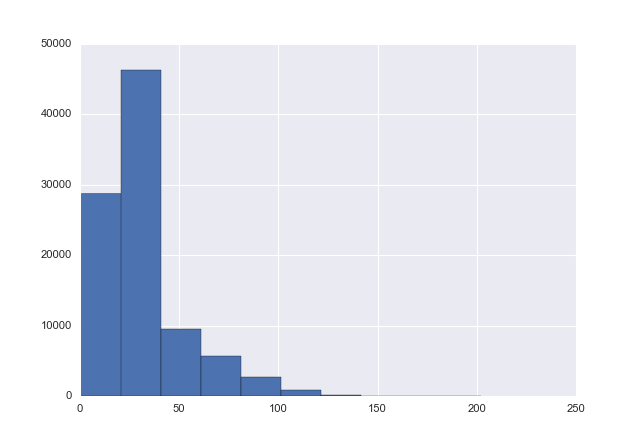

(array([  2.87610000e+04,   4.62940000e+04,   9.55700000e+03,
          5.73900000e+03,   2.67200000e+03,   8.01000000e+02,
          1.99000000e+02,   3.60000000e+01,   7.00000000e+00,
          2.00000000e+00]),
 array([   0.73 ,   20.848,   40.966,   61.084,   81.202,  101.32 ,
         121.438,  141.556,  161.674,  181.792,  201.91 ]),
 <a list of 10 Patch objects>)

In [11]:
plt.figure()
plt.hist(data_thr.rate)

<IPython.core.display.Javascript object>


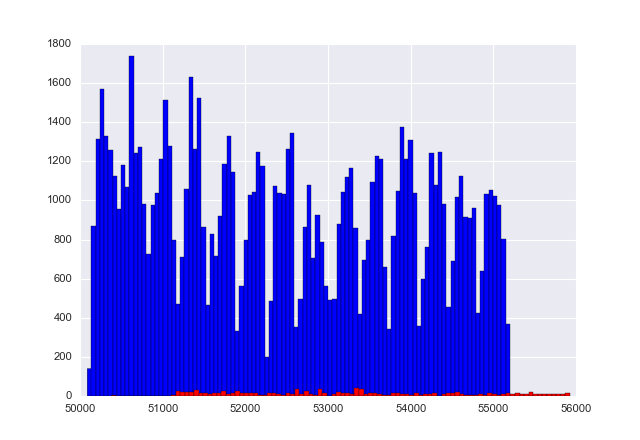

In [12]:
plt.figure()
plt.hist(mjd_asm, color='blue', bins=100)  # , normed=True)
plt.hist(mjd_iirc, color='red', bins=100);  # , normed=True)

<IPython.core.display.Javascript object>


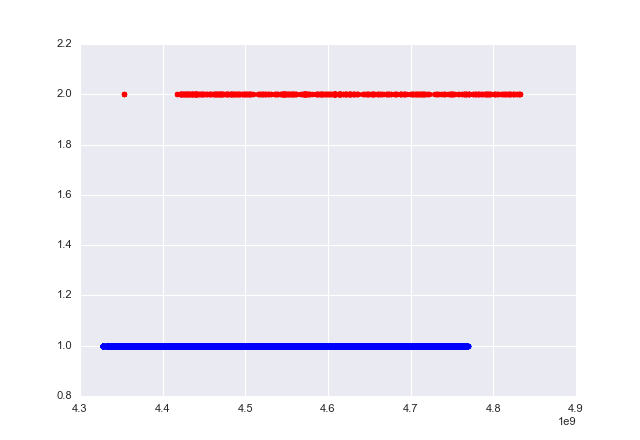

In [13]:
plt.figure()
plt.scatter(mjd_asm*86400.0, np.ones_like(mjd_asm), color='blue')  # , normed=True)
plt.scatter(mjd_iirc*86400.0, np.ones_like(mjd_iirc)*2., color='red');  # , normed=True)

In [14]:
A = np.zeros((mjd_asm.shape[0], mjd_iirc.shape[0]))
for j in range(mjd_iirc.shape[0]):
    A[:, j] = np.abs(mjd_asm - mjd_iirc[j]) < 9 * 360. / 86400

ind_asm = np.array([int(A[k, :].sum() > 0) for k in range(mjd_asm.shape[0])])

ind_iirc = np.array([int(A[:, k].sum() > 0) for k in range(mjd_iirc.shape[0])])
print ind_asm.sum(), ind_iirc.sum()

1240 463


<IPython.core.display.Javascript object>


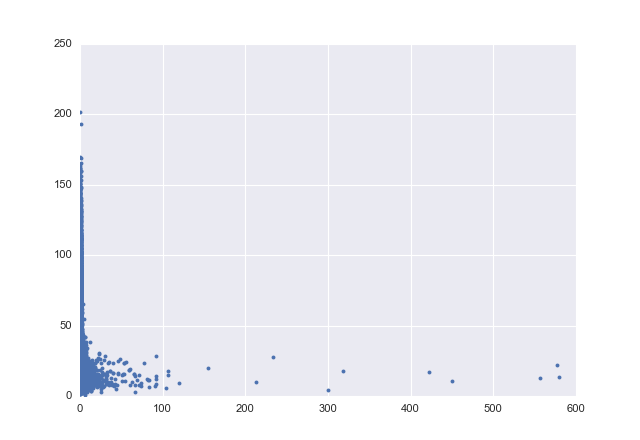

In [15]:
plt.figure()
plt.plot(X[:, 5], X[:, 1], '.')

<IPython.core.display.Javascript object>


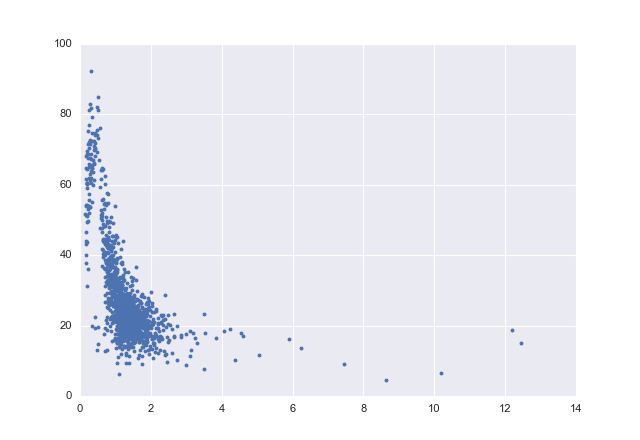

In [16]:
plt.figure()
plt.plot(X[np.array(ind_asm).astype(bool), 5], X[np.array(ind_asm).astype(bool), 1], '.')

<IPython.core.display.Javascript object>


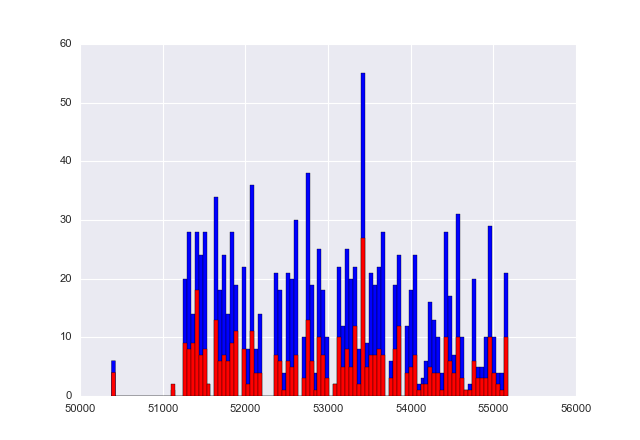

In [17]:
plt.figure()
plt.hist(mjd_asm[ind_asm.astype(bool)], bins=100, color='blue')  # , normed=True)
plt.hist(mjd_iirc[ind_iirc.astype(bool)], bins=100, color='red');  # , normed=True)

<IPython.core.display.Javascript object>


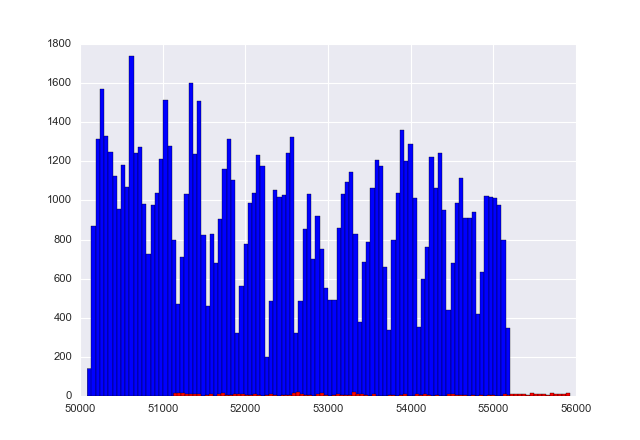

In [18]:
plt.figure()
plt.hist(mjd_asm[np.logical_not(ind_asm.astype(bool))], bins=100, color='blue')  # , normed=True)
plt.hist(mjd_iirc[np.logical_not(ind_iirc.astype(bool))], bins=100, color='red');  # , normed=True)